# Zadanie domowe - EDA Danych dotyczących Irysów

* Twoim zadaniem jest wykonanie analizy danych zawartych w załączonym pliku CSV (`25__iris.csv`).
* Plik znajduje się pod video. Pamiętaj, żeby wrzucić plik do tego samego folderu, w którym znajduje się ten notebook.
* Wykorzystaj nowo nabytą wiedzę z biblioteki `Pandas`
* Jeżeli jest taka konieczność posiłkuj się [code explainerem](https://codeexplainer.imprv.ai/) lub / i [data chatterem](https://datachatter.imprv.ai/) (który również te dane ma dostępne).
* Prześlij na discordzie notebook z rozwiązaniem (`#modul-4-zad1`)
* Pamiętaj:

1. Nie spiesz się
2. Potraktuj zadanie domowe jak prawdziwy projekt
3. Dodawaj opisy, obserwacje, wnioski
4. Dodaj wizualizacje
5. Dodaj konkluzję i wnioski końcowe

Powodzenia!!! I mega zabawy!

## O Danych

Zbiór danych zawiera informacje o trzech gatunkach irysów: Iris setosa, Iris versicolor, i Iris virginica.

Dane obejmują pomiary czterech cech: długość i szerokość działki kielicha oraz długość i szerokość płatka.

Każdy wiersz w zbiorze danych reprezentuje pojedynczy kwiat, a wartości pomiarów są podane w centymetrach.

Zbiór składa się z 150 próbek, po 50 dla każdego gatunku, i jest szeroko stosowany jako podstawowy zbiór danych do
testowania algorytmów klasyfikacji oraz w nauce o danych i uczeniu maszynowym.

Kolumny:
* **długość kielicha (sepal length)** - Długość kielicha w cm
* **szerokość kielicha (sepal width)** - Szerokość kielicha w cm
* **długość płatka (petal length)** - Długość płatka w cm
* **szerokość płatka (petal width)** - Szerokość płatka w cm
* **klasa (class)** - Klasa irysa (setosa, versicolor, virginica)

In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pd.set_option('display.max_columns', None)

## 1. Ogólny przegląd danych i analiza brakujących wartości

In [2]:
df = pd.read_csv('25__iris.csv', sep=",")
df

długość kielicha (sepal length)  szerokość kielicha (sepal width)  \
0                                5.1                               3.5   
1                                4.9                               3.0   
2                                4.7                               3.2   
3                                4.6                               3.1   
4                                5.0                               3.6   
..                               ...                               ...   
145                              6.7                               3.0   
146                              6.3                               2.5   
147                              6.5                               3.0   
148                              6.2                               3.4   
149                              5.9                               3.0   

     długość płatka (petal length)  szerokość płatka (petal width)  \
0                              1.4                             0.2   
1                              1.4                             0.2   
2                              1.3                             0.2   
3                              1.5                             0.2   
4                              1.4                             0.2   
..                             ...                             ...   
145                            5.2                             2.3   
146                            5.0                             1.9   
147                            5.2                             2.0   
148                            5.4                             2.3   
149                            5.1                             1.8   

      klasa (class)  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  Iris-virginica  
146  Iris-virginica  
147  Iris-virginica  
148  Iris-virginica  
149  Iris-virginica  

[150 rows x 5 columns]

In [18]:
# Wyświetlenie podstawowych informacji o danych zawartych w pliku
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   długość kielicha (sepal length)   150 non-null    float64
 1   szerokość kielicha (sepal width)  150 non-null    float64
 2   długość płatka (petal length)     150 non-null    float64
 3   szerokość płatka (petal width)    150 non-null    float64
 4   klasa (class)                     150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [15]:
# Sprawdzenie liczby unikatowych wartości w każdej kolumnie
unikalne_wartosci = df.nunique()
print(unikalne_wartosci)

długość kielicha (sepal length)     35
szerokość kielicha (sepal width)    23
długość płatka (petal length)       43
szerokość płatka (petal width)      22
klasa (class)                        3
dtype: int64


In [19]:
# Sprawdzenie brakujących wartości w każdej kolumnie
brakujace_wartosci = df.isnull().sum()
print(brakujace_wartosci)

długość kielicha (sepal length)     0
szerokość kielicha (sepal width)    0
długość płatka (petal length)       0
szerokość płatka (petal width)      0
klasa (class)                       0
dtype: int64


In [16]:
# Sprawdzenie liczby rekordów dla każdej klasy w kolumnie 'klasa (class)'
liczba_rekordow_na_klase = df['klasa (class)'].value_counts()
print(liczba_rekordow_na_klase)

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: klasa (class), dtype: int64


In [17]:
# Podsumowanie dla wszystkich kolumn numerycznych
podsumowanie = df.describe()
print(podsumowanie)

       długość kielicha (sepal length)  szerokość kielicha (sepal width)  \
count                       150.000000                        150.000000   
mean                          5.843333                          3.054000   
std                           0.828066                          0.433594   
min                           4.300000                          2.000000   
25%                           5.100000                          2.800000   
50%                           5.800000                          3.000000   
75%                           6.400000                          3.300000   
max                           7.900000                          4.400000   

       długość płatka (petal length)  szerokość płatka (petal width)  
count                     150.000000                      150.000000  
mean                        3.758667                        1.198667  
std                         1.764420                        0.763161  
min                         1.0

### Podsumowanie:

- Cztery kolumny zawierają dane numeryczne, jedna kolumna zawiera dane kategoryczne.
- Każda z trzech klas reprezentowana jest przez 50 rekordów, co świadczy o zbalansowanym zestawie danych.
- Dane są kompletne, co eliminuje potrzebę uzupełniania brakujących wartości.
- Różnorodność unikatowych wartości w zmiennych numerycznych oraz wartości parametrów statystycznych świadczą o dobrym zróżnicowaniu danych.

## 2. Analiza pojedynczych zmiennych

In [ ]:
# Wyświetlenie nazw kolumn
print("Nazwy kolumn:")
print(df.columns.tolist())

Nazwy kolumn:
['długość\xa0kielicha (sepal length)', 'szerokość kielicha (sepal width)', 'długość płatka (petal length)', 'szerokość płatka (petal width)', 'klasa (class)']


In [ ]:
# Wyświetlenie nazw kolumn z długościami, aby sprawdzić nadmiarowe znaki
print("Długości nazw kolumn:")
for col in df.columns:
    print(f"{col}: {len(col)}")

Długości nazw kolumn:
długość kielicha (sepal length): 31
szerokość kielicha (sepal width): 32
długość płatka (petal length): 29
szerokość płatka (petal width): 30
klasa (class): 13


In [29]:
# Usunięcie niewidocznych znaków z nazw kolumn
df.columns = df.columns.str.replace('\xa0', ' ').str.strip()

# Sprawdzenie nazw kolumn po usunięciu niewidocznych znaków
print("Uproszczone nazwy kolumn:")
print(df.columns.tolist())

Uproszczone nazwy kolumn:
['długość kielicha (sepal length)', 'szerokość kielicha (sepal width)', 'długość płatka (petal length)', 'szerokość płatka (petal width)', 'klasa (class)']


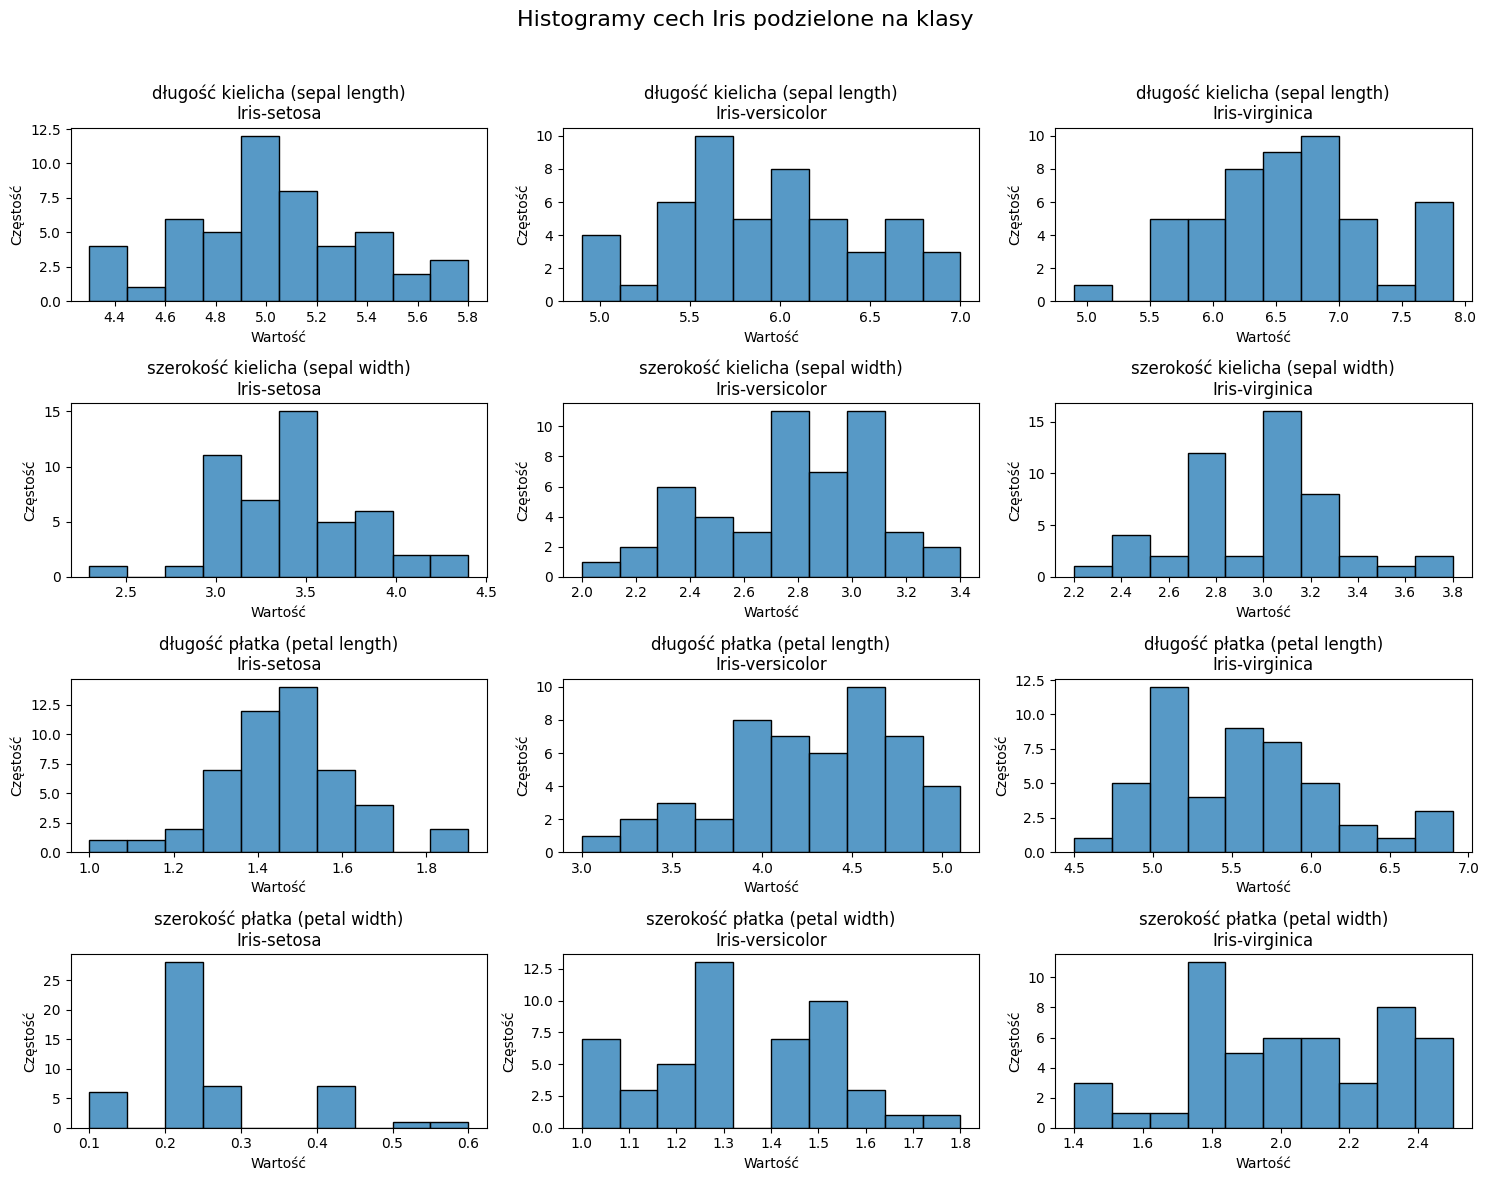

In [34]:
# Utworzenie wykresów
fig, axs = plt.subplots(4, 3, figsize=(15, 12))
fig.suptitle('Histogramy cech Iris podzielone na klasy', fontsize=16)

# Lista kolumn numerycznych
numeric_columns = [
    'długość kielicha (sepal length)',
    'szerokość kielicha (sepal width)',
    'długość płatka (petal length)',
    'szerokość płatka (petal width)'
]

# Lista unikatowych klas
classes = df['klasa (class)'].unique()

# Rysowanie histogramów
for i, col in enumerate(numeric_columns):
    for j, class_name in enumerate(classes):
        ax = axs[i, j]
        sns.histplot(df[df['klasa (class)'] == class_name][col], kde=False, bins=10, ax=ax)
        ax.set_title(f'{col}\n{class_name}')
        ax.set_xlabel('Wartość')
        ax.set_ylabel('Częstość')

# Rysowanie wykresów
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

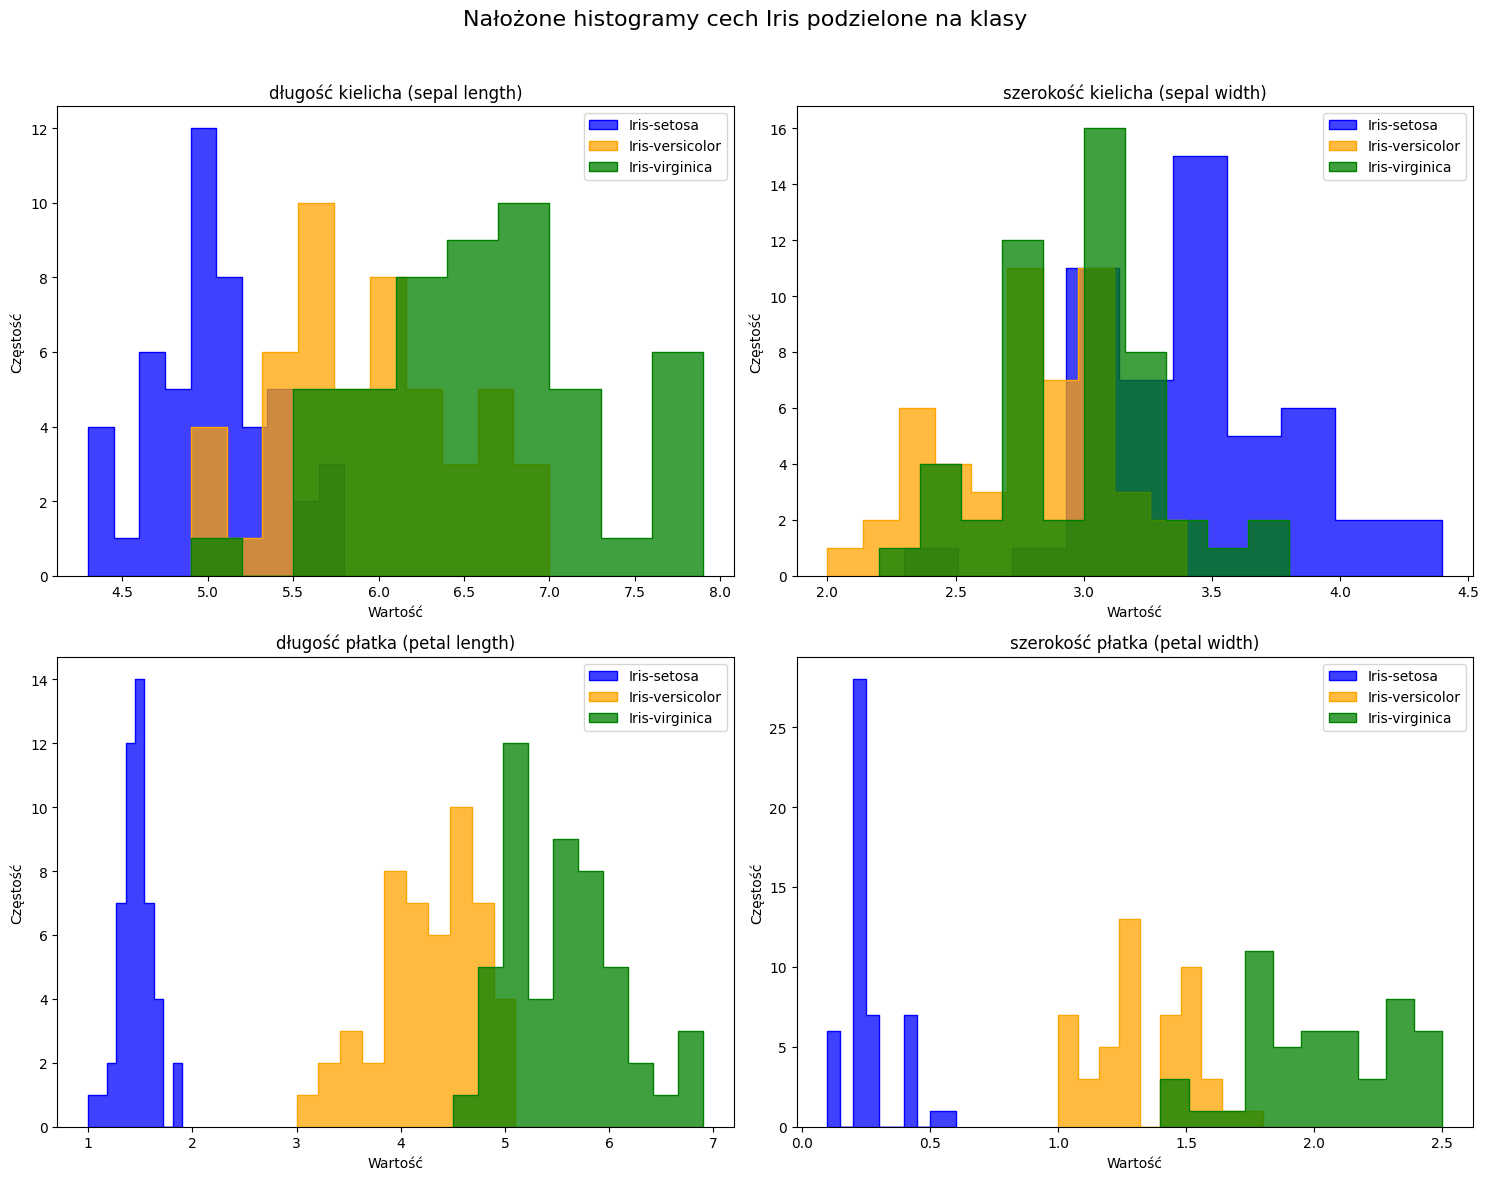

In [37]:
# Utworzenie wykresów dla nałożonych histogramów
fig, axs = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Nałożone histogramy cech Iris podzielone na klasy', fontsize=16)

# Lista unikatowych klas
classes = df['klasa (class)'].unique()
colors = ['blue', 'orange', 'green']

# Rysowanie nałożonych histogramów dla każdej cechy
for ax, col in zip(axs.flat, numeric_columns):
    for class_name, color in zip(classes, colors):
        sns.histplot(df[df['klasa (class)'] == class_name][col], kde=False, bins=10, ax=ax, label=class_name, color=color, element='step', stat='count', common_norm=False)
    ax.set_title(col)
    ax.set_xlabel('Wartość')
    ax.set_ylabel('Częstość')
    ax.legend()

# Dostosowanie layoutu
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('Nałożone histogramy cech Iris podzielone na klasy', dpi=300)
plt.show()


### Podsumowanie:
- Histogramy pokazują, że cechy morfologiczne, takie jak długość i szerokość kielicha oraz płatka, mogą być używane do rozróżniania między trzema gatunkami Iris.
- Iris-setosa wyróżnia się znacząco mniejszymi wartościami długości i szerokości płatków w porównaniu do pozostałych gatunków. Jej wartości są skupione w węższych przedziałach.
- Iris-versicolor i Iris-virginica mają wartości długości i szerokości płatków oraz kielicha bardziej rozproszone, co może powodować pewne nakładanie się, zwłaszcza w zakresie długości i szerokości   kielicha.
- Iris-virginica ma największe wartości długości i szerokości płatków, co może być kluczową cechą różnicującą.
- Histogramy najbardziej nakładają się na siebie dla cech długość i szerokość kielicha.

## 3. Grupowanie i agregacja danych

In [69]:
# Grupowanie danych według klasy
grouped = df.groupby('klasa (class)')

# Obliczanie parametrów statystycznych dla każdej grupy
stats = grouped.agg(['mean', 'std', 'min', 'max', 'median', 'count'])

# Wyświetlanie wyników
stats

długość kielicha (sepal length)                             \
                                           mean       std  min  max median   
klasa (class)                                                                
Iris-setosa                               5.006  0.352490  4.3  5.8    5.0   
Iris-versicolor                           5.936  0.516171  4.9  7.0    5.9   
Iris-virginica                            6.588  0.635880  4.9  7.9    6.5   

                      szerokość kielicha (sepal width)                      \
                count                             mean       std  min  max   
klasa (class)                                                                
Iris-setosa        50                            3.418  0.381024  2.3  4.4   
Iris-versicolor    50                            2.770  0.313798  2.0  3.4   
Iris-virginica     50                            2.974  0.322497  2.2  3.8   

                             długość płatka (petal length)                 \
                median count                          mean       std  min   
klasa (class)                                                               
Iris-setosa        3.4    50                         1.464  0.173511  1.0   
Iris-versicolor    2.8    50                         4.260  0.469911  3.0   
Iris-virginica     3.0    50                         5.552  0.551895  4.5   

                                  szerokość płatka (petal width)            \
                 max median count                           mean       std   
klasa (class)                                                                
Iris-setosa      1.9   1.50    50                          0.244  0.107210   
Iris-versicolor  5.1   4.35    50                          1.326  0.197753   
Iris-virginica   6.9   5.55    50                          2.026  0.274650   

                                        
                 min  max median count  
klasa (class)                           
Iris-setosa      0.1  0.6    0.2    50  
Iris-versicolor  1.0  1.8    1.3    50  
Iris-virginica   1.4  2.5    2.0    50

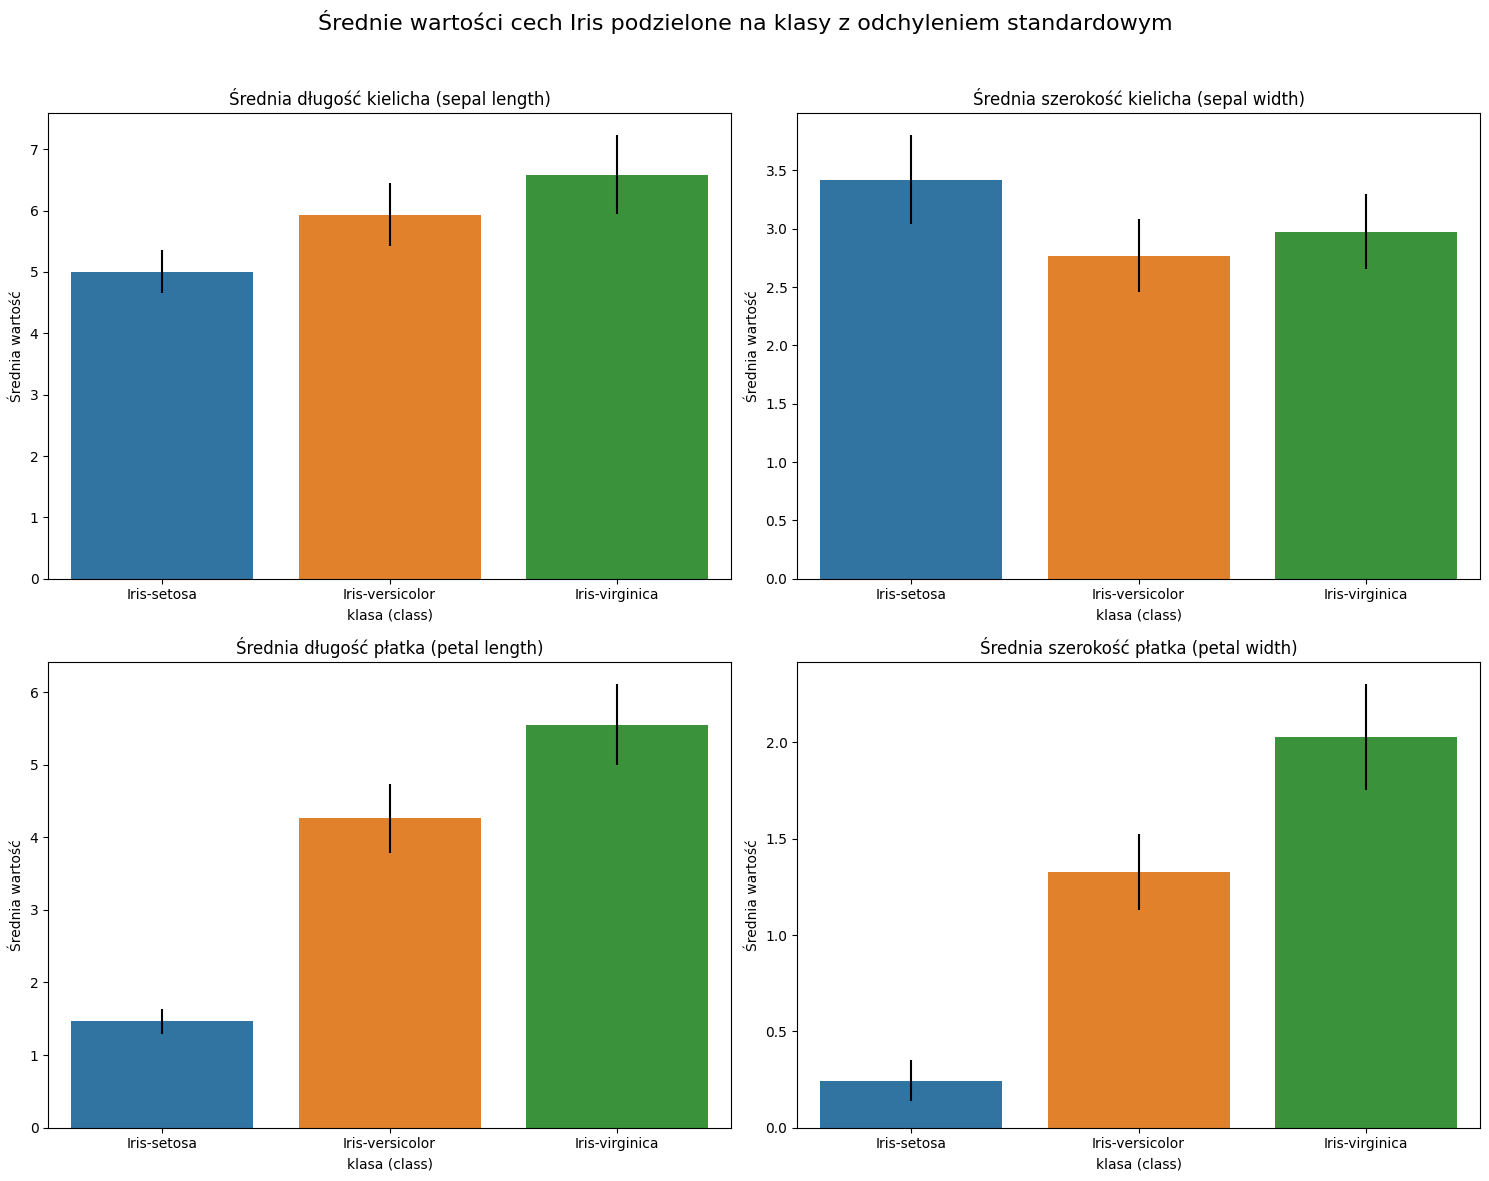

In [70]:
# Resetowanie indeksu
stats = stats.reset_index()

# Wykres słupkowy dla średnich wartości długości kielicha, szerokości kielicha, długości płatka, szerokości płatka
fig, axs = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Średnie wartości cech Iris podzielone na klasy z odchyleniem standardowym', fontsize=16)

# Długość kielicha (sepal length)
sns.barplot(x='klasa (class)', y=('długość kielicha (sepal length)', 'mean'),
            yerr=stats[('długość kielicha (sepal length)', 'std')], data=stats, ax=axs[0, 0])
axs[0, 0].set_title('Średnia długość kielicha (sepal length)')
axs[0, 0].set_ylabel('Średnia wartość')

# Szerokość kielicha (sepal width)
sns.barplot(x='klasa (class)', y=('szerokość kielicha (sepal width)', 'mean'),
            yerr=stats[('szerokość kielicha (sepal width)', 'std')], data=stats, ax=axs[0, 1])
axs[0, 1].set_title('Średnia szerokość kielicha (sepal width)')
axs[0, 1].set_ylabel('Średnia wartość')

# Długość płatka (petal length)
sns.barplot(x='klasa (class)', y=('długość płatka (petal length)', 'mean'),
            yerr=stats[('długość płatka (petal length)', 'std')], data=stats, ax=axs[1, 0])
axs[1, 0].set_title('Średnia długość płatka (petal length)')
axs[1, 0].set_ylabel('Średnia wartość')

# Szerokość płatka (petal width)
sns.barplot(x='klasa (class)', y=('szerokość płatka (petal width)', 'mean'),
            yerr=stats[('szerokość płatka (petal width)', 'std')], data=stats, ax=axs[1, 1])
axs[1, 1].set_title('Średnia szerokość płatka (petal width)')
axs[1, 1].set_ylabel('Średnia wartość')

# Dostosowanie wykresów
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### Podsumowanie

- Wszystkie cechy wykazują wyraźne różnice między gatunkami. Największe różnice widać w długości i szerokości płatka.
- Słupki błędu (odchylenie standardowe) są relatywnie małe w porównaniu do wartości średnich, co wskazuje na niską zmienność danych w obrębie każdego gatunku.
- Wartości odstające i wariancja są bardziej widoczne w cechach takich jak szerokość kielicha, co może wymagać dalszej analizy.

## 4. Analiza relacji między zmiennymi

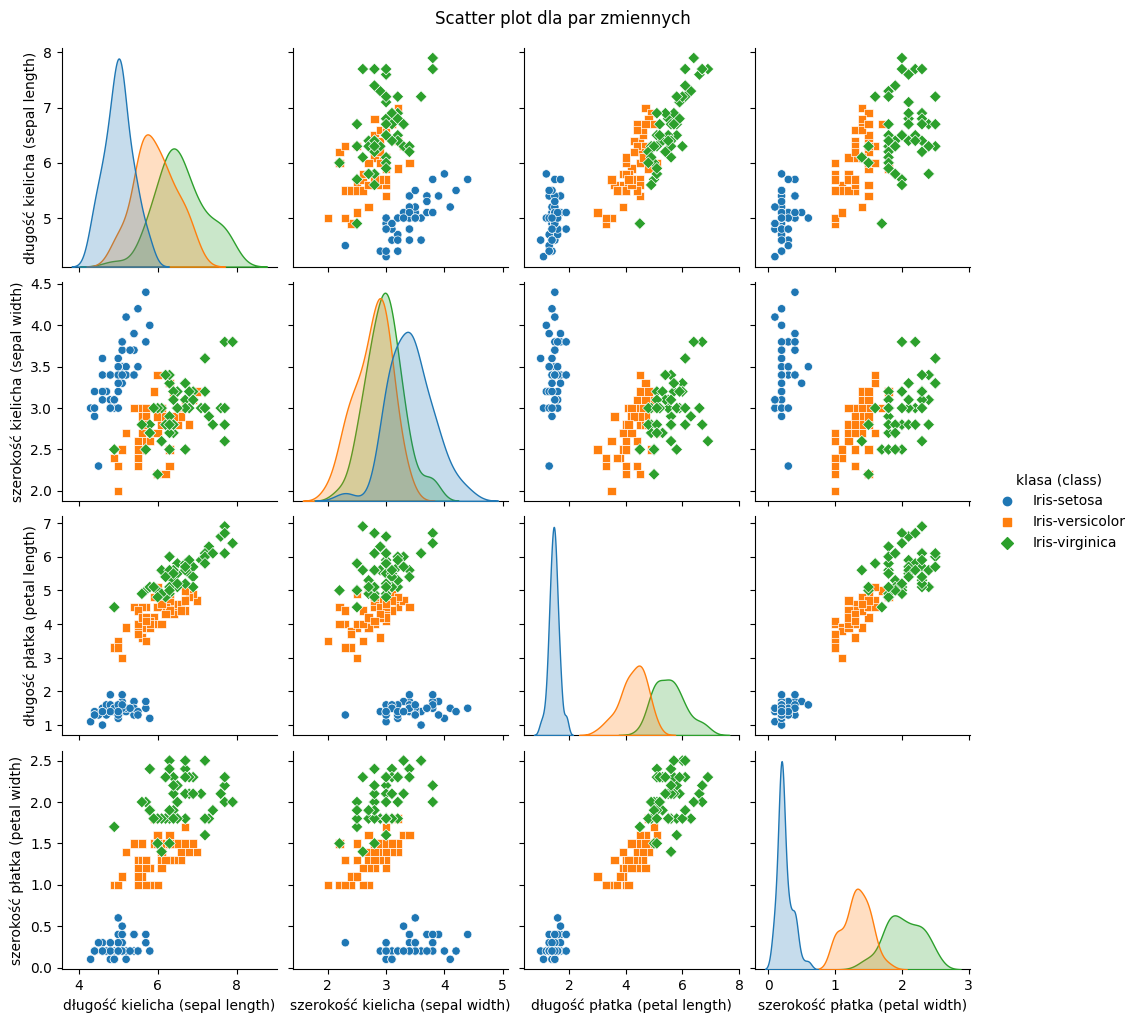

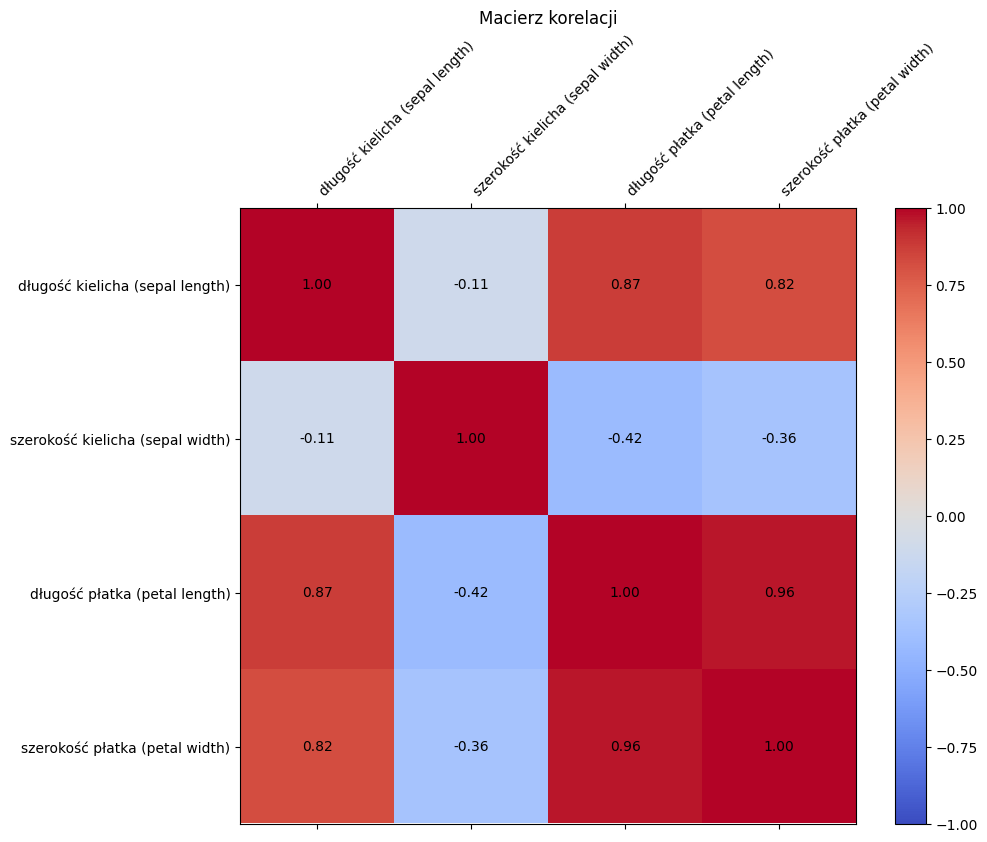

In [51]:
# Scatter plot dla par zmiennych
sns.pairplot(df, hue='klasa (class)', markers=["o", "s", "D"])
plt.suptitle('Scatter plot dla par zmiennych', y=1.02)
plt.show()

# Macierz korelacji
corr_matrix = df.iloc[:, :-1].corr()  # Obliczanie korelacji tylko dla kolumn numerycznych

# Tworzenie macierzy korelacji z wartościami
fig, ax = plt.subplots(figsize=(10, 8))
cax = ax.matshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)

# Dodanie paska kolorów
fig.colorbar(cax)

# Ustawienie etykiet
ax.set_xticks(np.arange(len(corr_matrix.columns)))
ax.set_yticks(np.arange(len(corr_matrix.columns)))
ax.set_xticklabels(corr_matrix.columns, rotation=45, ha='left')
ax.set_yticklabels(corr_matrix.columns)

# Dodanie wartości korelacji na macierzy
for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        plt.text(j, i, f'{corr_matrix.iloc[i, j]:.2f}', ha='center', va='center', color='black')

plt.title('Macierz korelacji')
plt.show()

### Podsumowanie:

**Scatter Plots**:

- Iris-setosa jest wyraźnie oddzielona od dwóch pozostałych gatunków we wszystkich zmiennych.
- Iris-versicolor i Iris-virginica mają pewne nakładające się wartości, ale można je rozróżnić na podstawie wielkości płatków.

**Macierz korelacji**:

- **Długość kielicha (sepal length) vs. długość płatka (petal length)**:  Korelacja wynosi 0.87, co wskazuje na silną pozytywną korelację. To oznacza, że dłuższe kielichy mają tendencję do posiadania dłuższych płatków.
- **Długość płatka (petal length) vs. szerokość płatka (petal width)**:  Korelacja wynosi 0.96, co wskazuje na bardzo silną pozytywną korelację. To oznacza, że dłuższe płatki mają tendencję do bycia szerszymi.
- **Długość kielicha (sepal length) vs. szerokość płatka (petal width)**:  Korelacja wynosi 0.82, co również wskazuje na silną pozytywną korelację.
- **Szerokość kielicha (sepal width) vs. długość płatka (petal length)**:  Korelacja wynosi -0.42, co wskazuje na umiarkowaną ujemną korelację. To oznacza, że szersze kielichy mają tendencję do posiadania krótszych płatków.
- **Szerokość kielicha (sepal width) vs. szerokość płatka (petal width)**:  Korelacja wynosi -0.36, co wskazuje na słabą ujemną korelację.


## 5. Analiza wartości odstających

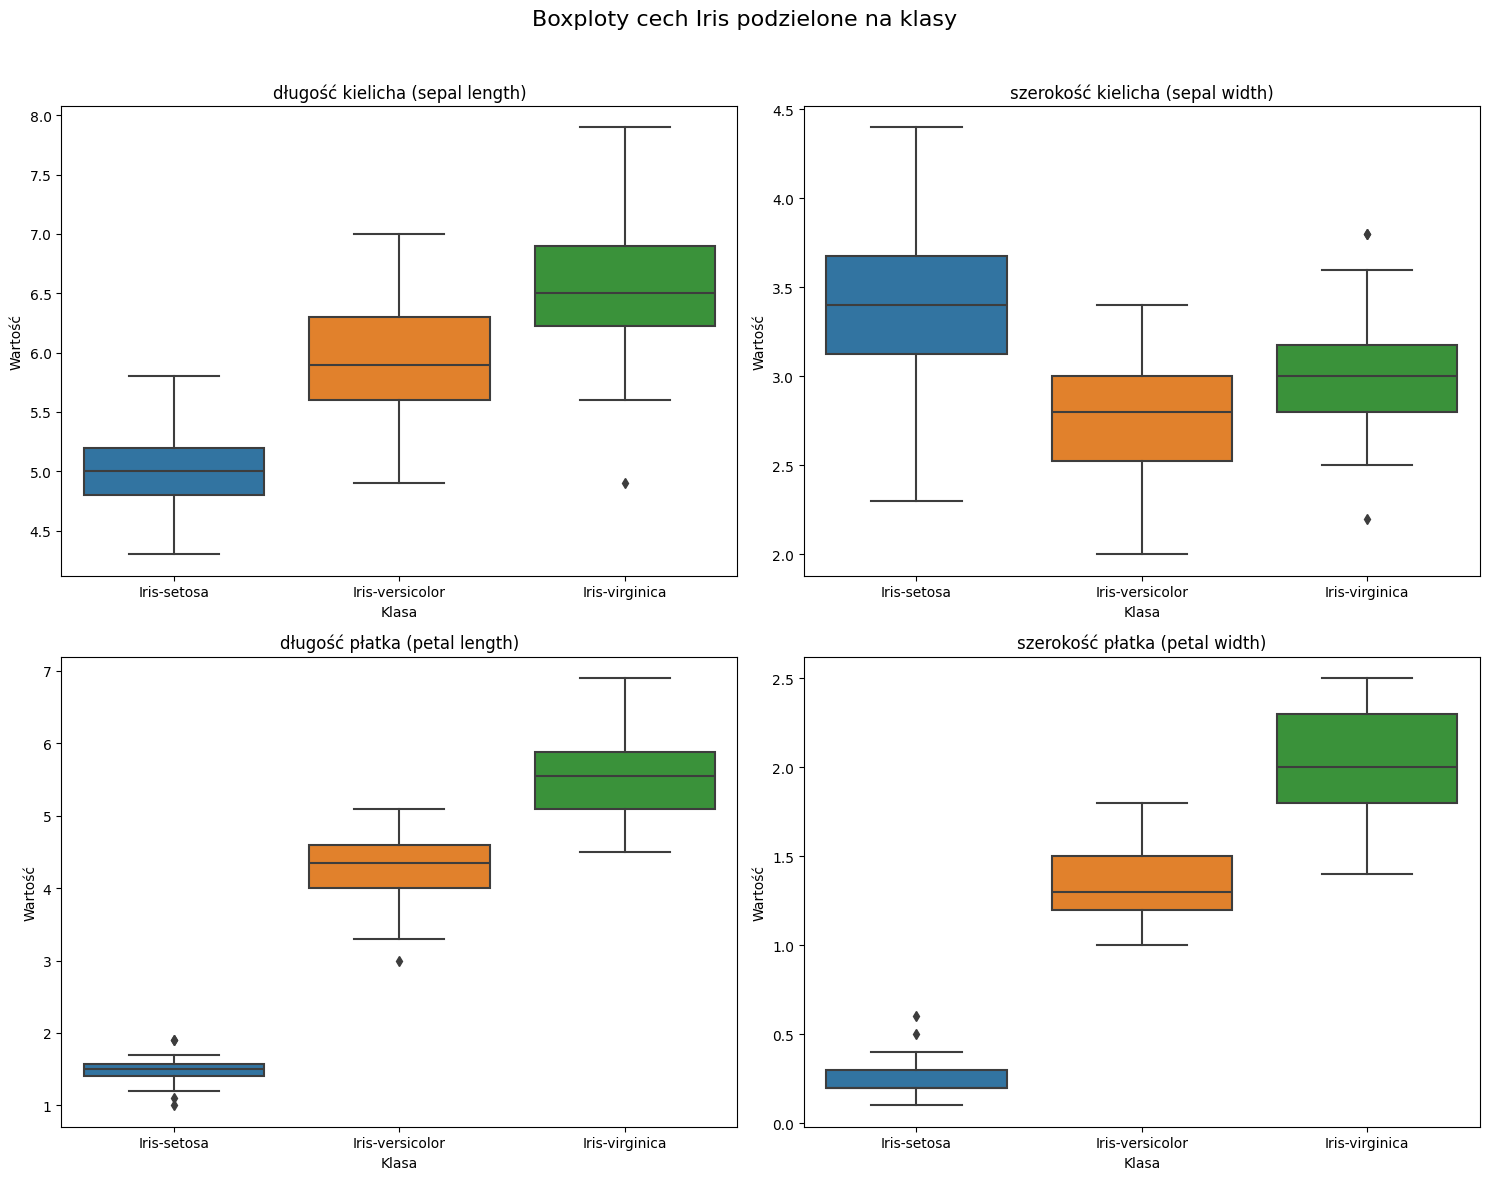

In [53]:
# Utworzenie wykresów dla boxplotów
fig, axs = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Boxploty cech Iris podzielone na klasy', fontsize=16)

# Rysowanie boxplotów dla każdej cechy
for ax, col in zip(axs.flat, numeric_columns):
    sns.boxplot(x='klasa (class)', y=col, data=df, ax=ax)
    ax.set_title(f'{col}')
    ax.set_xlabel('Klasa')
    ax.set_ylabel('Wartość')

# Dostosowanie wykresów
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


### Podsumowanie

- Wartości odstające są widoczne głównie w przypadku Iris-setosa dla cech długości i szerokości płatka. Są to wartości poniżej dolnego wąsa wykresu pudełkowego.
- W przypadku Iris-versicolor, pojawia się pojedyncza wartość odstająca dla długości kielicha i długości płatka.
- Iris-virginica ma jedną wartość odstającą dla szerokości kielicha.
- Wykresy boxplot potwierdzają poprzednie obserwacje na temat rozkładu danych dla poszczegolnych klas.

## 6. Wnioski z analizy danych i PCA

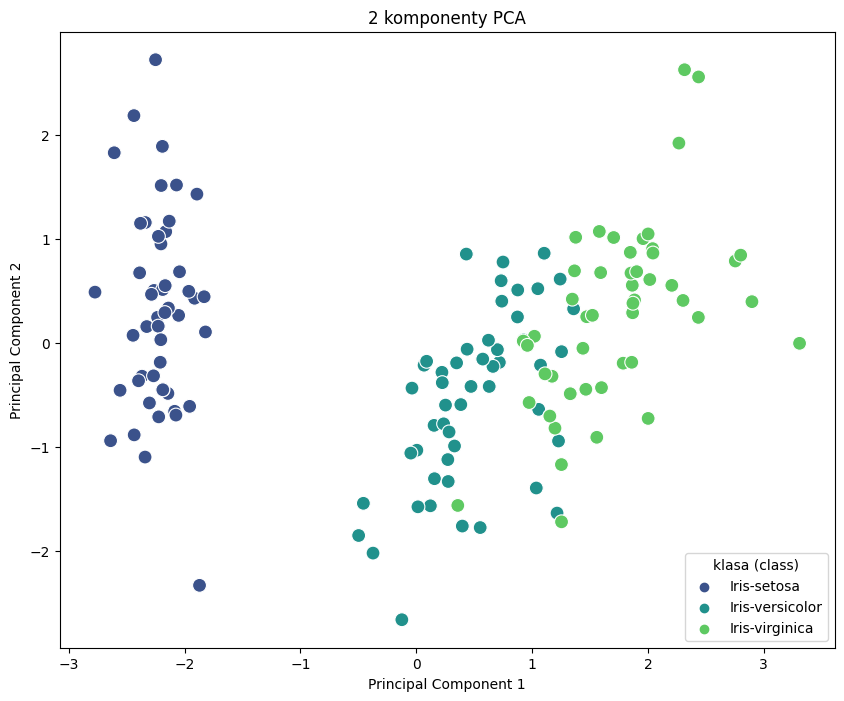

In [73]:
# Wybór zmiennych numerycznych do PCA
X = df.iloc[:, :-1]

# Standaryzacja danych
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Wykonanie PCA
pca = PCA(n_components=2)  # Redukcja do 2 głównych składowych
principalComponents = pca.fit_transform(X_scaled)

# Tworzenie DataFrame z głównymi składowymi
principalDf = pd.DataFrame(data=principalComponents, columns=['Principal Component 1', 'Principal Component 2'])

# Dodanie kolumny klasy
finalDf = pd.concat([principalDf, df[['klasa (class)']]], axis=1)

# Wizualizacja wyników PCA
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='klasa (class)', data=finalDf, palette='viridis', s=100)
plt.title('2 komponenty PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.savefig('2 komponenty PCA',dpi=300)
plt.show()

### **Kluczowe Wnioski z Analiz**

- Cecha długości i szerokości płatka są kluczowe w różnicowaniu gatunków Iris. Te cechy wykazały największą zmienność między gatunkami i były najlepiej rozdzielone w analizie PCA.
- Wykresy rozkładu oraz boxploty ujawniły, że zmienność wewnątrz gatunków jest różna, z Iris-setosa wykazującą najmniejszą zmienność, a Iris-virginica największą.
- Silne korelacje między długością i szerokością płatka sugerują, że te cechy mogą być skonsolidowane lub używane wymiennie w modelach predykcyjnych.
- Obecność wartości odstających, zwłaszcza dla szerokości kielicha, może wpłynąć na dokładność modeli predykcyjnych i wymaga dalszej analizy lub przetwarzania danych.
- Wykres PCA wykazał wyraźne rozdzielenie klas Iris-setosa od pozostałych dwóch gatunków. Iris-versicolor i Iris-virginica częściowo się pokrywały, co sugeruje, że ich rozdzielenie może wymagać bardziej zaawansowanych metod analizy lub dodatkowych cech.

Analizy dostarczyły kompleksowego przeglądu danych Iris, identyfikując kluczowe cechy różnicujące gatunki i ujawniając strukturę danych. Dzięki zastosowaniu różnych technik analitycznych i wizualizacji, uzyskano cenne informacje, które stanowią solidne podstawy do dalszego modelowania i eksploracji danych. Przeprowadzone analizy nie tylko potwierdziły, że dane są wysokiej jakości, ale również wskazały na kluczowe obszary do dalszych badań, które mogą przyczynić się do jeszcze lepszego zrozumienia i klasyfikacji gatunków Iris.